## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


### Predict delivery time using sorting time 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading Dataset
deliv= pd.read_csv("delivery_time.csv")
deliv.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#renaming columns
deliv=deliv.rename(columns={'Delivery Time':'Delivery_time'})
deliv=deliv.rename(columns={"Sorting Time":"Sorting_time"})

In [4]:
# fetching information by using info and describe function to understand the data well.
deliv.describe(),deliv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


(       Delivery_time  Sorting_time
 count      21.000000     21.000000
 mean       16.790952      6.190476
 std         5.074901      2.542028
 min         8.000000      2.000000
 25%        13.500000      4.000000
 50%        17.830000      6.000000
 75%        19.750000      8.000000
 max        29.000000     10.000000,
 None)

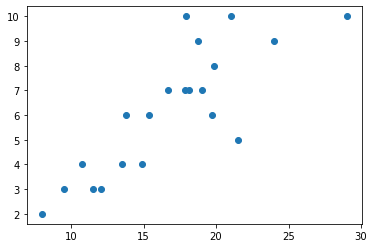

In [5]:
#plotting scatter plot to understand relationship between the target and the independent variable.
plt.scatter(deliv['Delivery_time'],deliv['Sorting_time']);

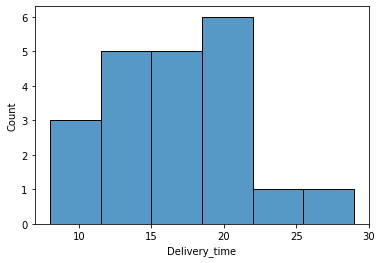

In [6]:
sns.histplot(deliv['Delivery_time']);


In [7]:
deliv.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


In [8]:
#defining x and y variable
x=np.array([deliv["Sorting_time"]]).transpose()
y=np.array(deliv["Delivery_time"])
x.shape,y.shape

((21, 1), (21,))

In [9]:
#training model by using ols and sklearn 
model_ols = sm.OLS(y,sm.add_constant(x)).fit()
model_sk = LinearRegression()
model_sk.fit(x,y)

LinearRegression()

In [10]:
model_sk.coef_,model_sk.score(x,y),model_ols.rsquared,model_ols.summary()

(array([1.6490199]),
 0.6822714748417231,
 0.6822714748417231,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.682
 Model:                            OLS   Adj. R-squared:                  0.666
 Method:                 Least Squares   F-statistic:                     40.80
 Date:                Tue, 05 Jul 2022   Prob (F-statistic):           3.98e-06
 Time:                        03:01:23   Log-Likelihood:                -51.357
 No. Observations:                  21   AIC:                             106.7
 Df Residuals:                      19   BIC:                             108.8
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------

In [11]:
prediction = model_sk.predict(x)
mse = mean_squared_error(y,prediction)
rmse = np.sqrt(mse)
mse,rmse

(7.793311548584063, 2.7916503270617654)

In [12]:
#cooks distance for influence point analysis
model_influence = model_ols.get_influence()
(c, _) = model_influence.cooks_distance

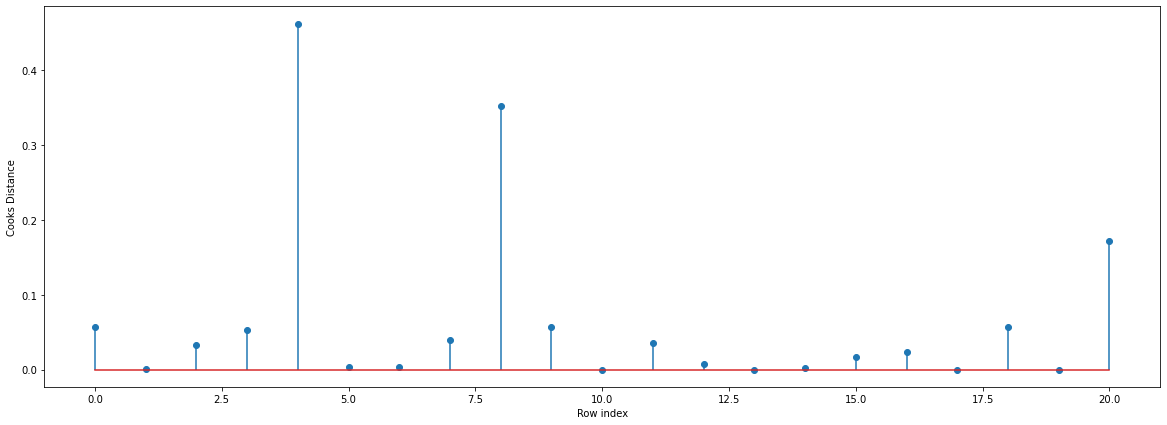

In [13]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(x)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [14]:
(np.argmax(c),np.max(c[c>0.2]))

(4, 0.4620530412650319)

### Here some points which are having c>0.2 are influential points so we will try to remove those and see the score.

In [15]:
#removing the 4th row 
deliv_new= pd.read_csv("delivery_time.csv")
deliv_new1 = deliv_new.drop(deliv_new.index[[4,8]],axis=0).reset_index()
deliv_new1 = deliv_new1[['Delivery Time','Sorting Time']]
deliv_new1.rename(columns={'Delivery Time':'Delivery_time',"Sorting Time":"Sorting_time"}, inplace=True)


In [16]:
deliv_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  19 non-null     float64
 1   Sorting_time   19 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 432.0 bytes


In [17]:
x1=np.array([deliv_new1["Sorting_time"]]).transpose()
y1=np.array(deliv_new1["Delivery_time"])
x1.shape,y1.shape

((19, 1), (19,))

In [18]:
model_ols1 = sm.OLS(y1,sm.add_constant(x1)).fit()
model_sk1 = LinearRegression()
model_sk1.fit(x1,y1)

LinearRegression()

In [19]:
model_sk1.coef_,model_sk1.score(x,y),model_ols1.rsquared,model_ols1.summary()

(array([1.61633803]),
 0.6818898398098328,
 0.7140755547043909,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.714
 Model:                            OLS   Adj. R-squared:                  0.697
 Method:                 Least Squares   F-statistic:                     42.46
 Date:                Tue, 05 Jul 2022   Prob (F-statistic):           5.28e-06
 Time:                        03:01:26   Log-Likelihood:                -42.891
 No. Observations:                  19   AIC:                             89.78
 Df Residuals:                      17   BIC:                             91.67
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----

### The score is definitely increasing for the model by removing outliers and also reduced the rmse 

In [20]:
prediction1 = model_sk1.predict(x1)
mse1 = mean_squared_error(y1,prediction1)
rmse1 = np.sqrt(mse1)
mse1,rmse1

(5.349288213491475, 2.3128528300545788)

In [21]:
model_influence1 = model_ols1.get_influence()
(c, _) = model_influence1.cooks_distance

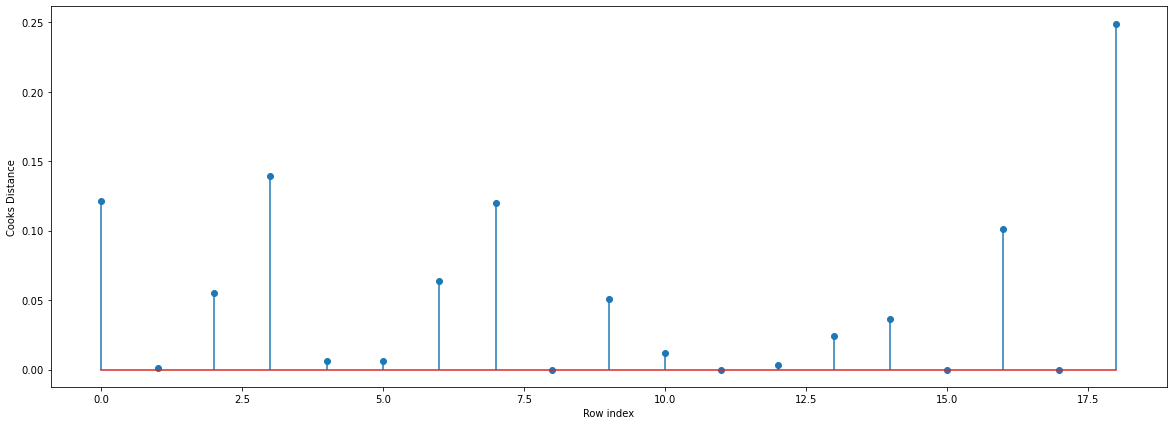

In [22]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(x1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
4/19

0.21052631578947367

In [24]:
deliv_new2 = deliv_new1.drop(deliv_new1.index[[18]],axis=0).reset_index()
deliv_new2 = deliv_new2[["Delivery_time","Sorting_time"]]
deliv_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  18 non-null     float64
 1   Sorting_time   18 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


In [25]:
x2=np.array([deliv_new2["Sorting_time"]]).transpose()
y2=np.array(deliv_new2["Delivery_time"])
x2.shape,y2.shape

((18, 1), (18,))

In [26]:
model_ols2 = sm.OLS(y2,sm.add_constant(x2)).fit()
model_sk2 = LinearRegression()
model_sk2.fit(x2,y2)

LinearRegression()

In [27]:
model_sk2.coef_,model_sk2.score(x,y),model_ols2.rsquared,model_ols2.summary()

(array([1.67407599]),
 0.6754721317387807,
 0.8332330202945817,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.833
 Model:                            OLS   Adj. R-squared:                  0.823
 Method:                 Least Squares   F-statistic:                     79.94
 Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.27e-07
 Time:                        03:01:27   Log-Likelihood:                -35.450
 No. Observations:                  18   AIC:                             74.90
 Df Residuals:                      16   BIC:                             76.68
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----

## After removing the outliers this is the final accuracy we are getting for the improved model

# The accuracy of the final model is 83.3%